In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:06<00:00, 337MB/s]
100% 1.06G/1.06G [00:06<00:00, 165MB/s]


In [3]:
import zipfile
zip_ref =  zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [5]:
# generators
train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode= 'int',
    batch_size = 32 ,
    image_size=(256,256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode= 'int',
    batch_size = 32 ,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#create CNN model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 79ms/step - loss: 0.6346 - accuracy: 0.6431 - val_loss: 0.5646 - val_accuracy: 0.7108
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.5023 - accuracy: 0.7523 - val_loss: 0.4699 - val_accuracy: 0.7828
Epoch 3/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3720 - accuracy: 0.8309 - val_loss: 0.4879 - val_accuracy: 0.7894
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2259 - accuracy: 0.9062 - val_loss: 0.6399 - val_accuracy: 0.7764
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1238 - accuracy: 0.9534 - val_loss: 0.8131 - val_accuracy: 0.7786
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0797 - accuracy: 0.9708 - val_loss: 1.1321 - val_accuracy: 0.7652
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0609 - accuracy: 0.9791 - val_loss: 1.1586 - val_accuracy:

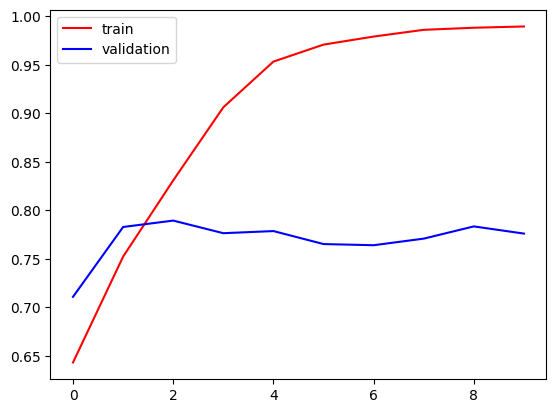

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

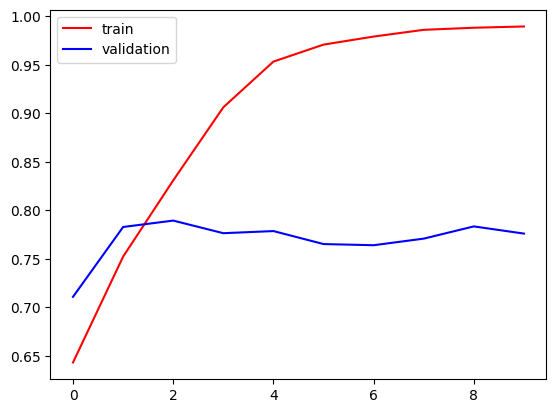

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

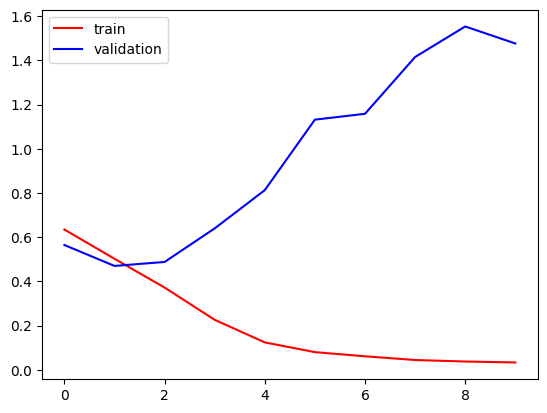

In [13]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

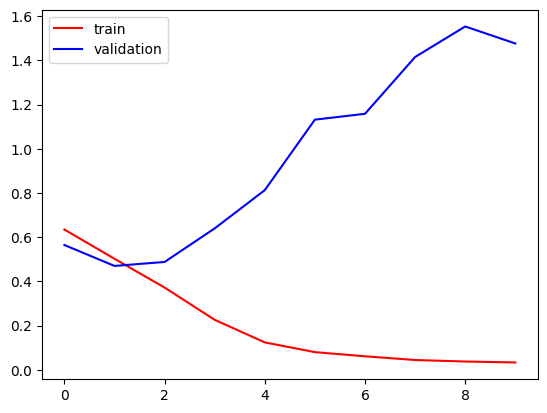

In [14]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:

import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [23]:

test_img = cv2.imread('/content/cat.jpg')


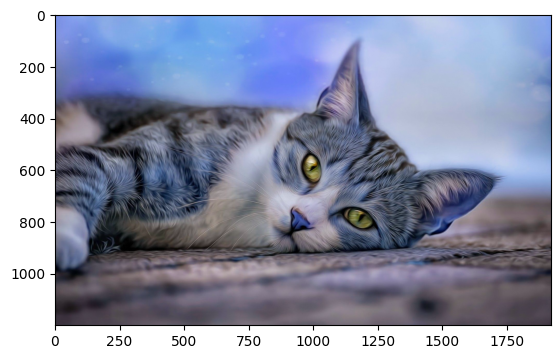

In [25]:
# Display the image
plt.imshow(test_img)

In [26]:

test_img.shape

(1200, 1920, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))

In [28]:

test_input = test_img.reshape((1,256,256,3))

In [29]:

model.predict(test_input)

1/1 [==============================] - 0s 241ms/step


array([[0.]], dtype=float32)